# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv("bank_transactions_data_2.csv")
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print(f"Banyak baris dan kolom pada data adalah {df.shape}")
print("============")
df.info()

Banyak baris dan kolom pada data adalah (2512, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            25

In [5]:
missing_values = df.isnull().sum()
missing_values

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

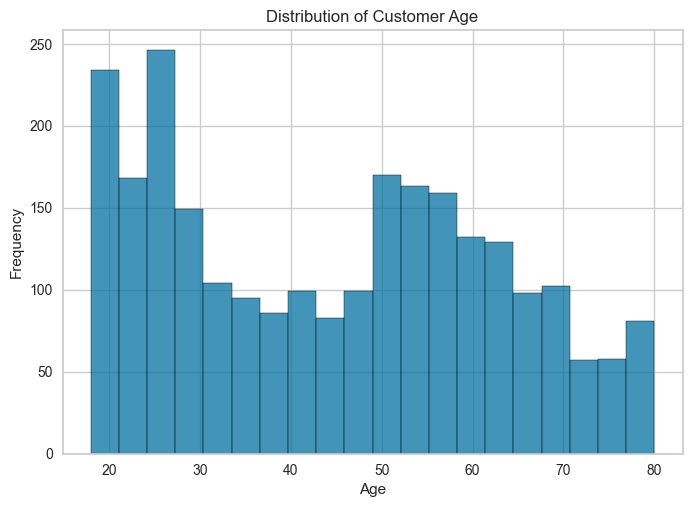

In [6]:
sns.histplot(df['CustomerAge'], bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

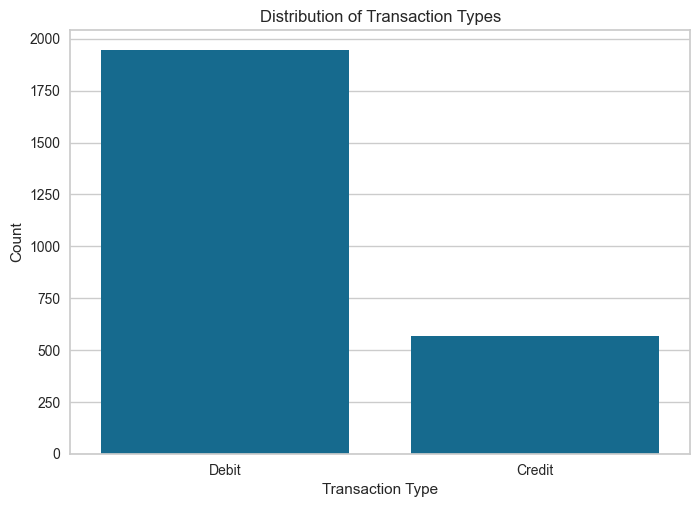

In [7]:
sns.countplot(df, x='TransactionType')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

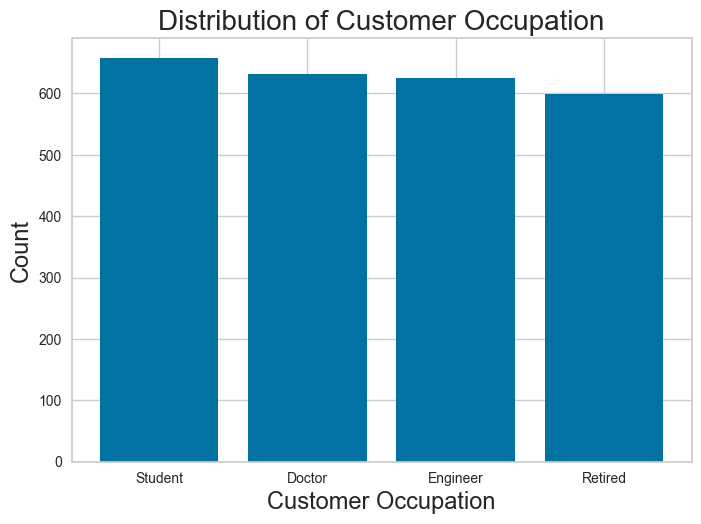

In [8]:
plt.bar(df['CustomerOccupation'].value_counts().index, df['CustomerOccupation'].value_counts().values)
plt.xlabel('Customer Occupation', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Distribution of Customer Occupation', fontsize=20)
plt.show()

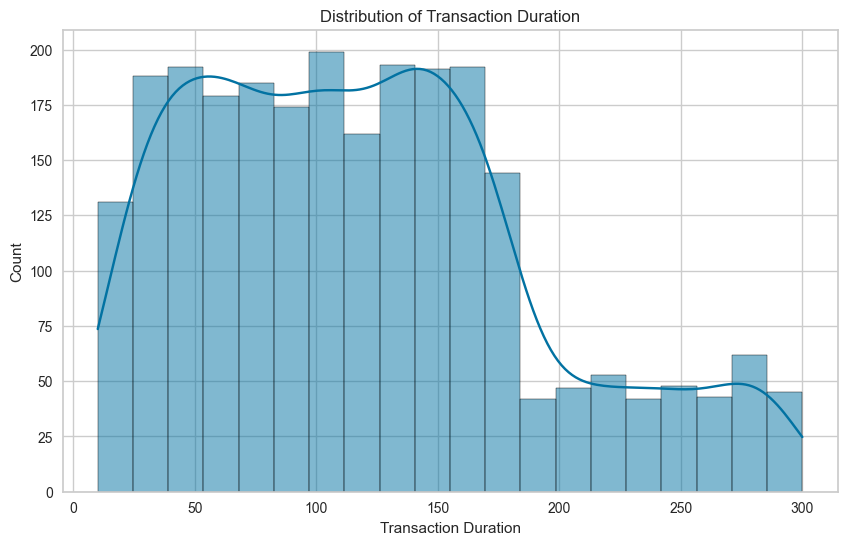

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TransactionDuration"], bins=20, edgecolor='black', kde=True)
plt.xlabel('Transaction Duration')
plt.ylabel('Count')
plt.title('Distribution of Transaction Duration')
plt.show()

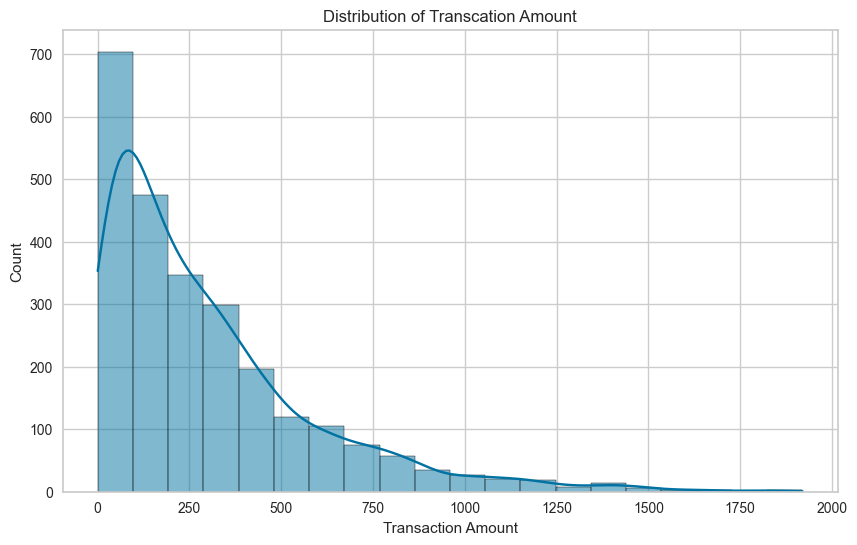

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df["TransactionAmount"], bins=20, edgecolor='black', kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transcation Amount')
plt.show()

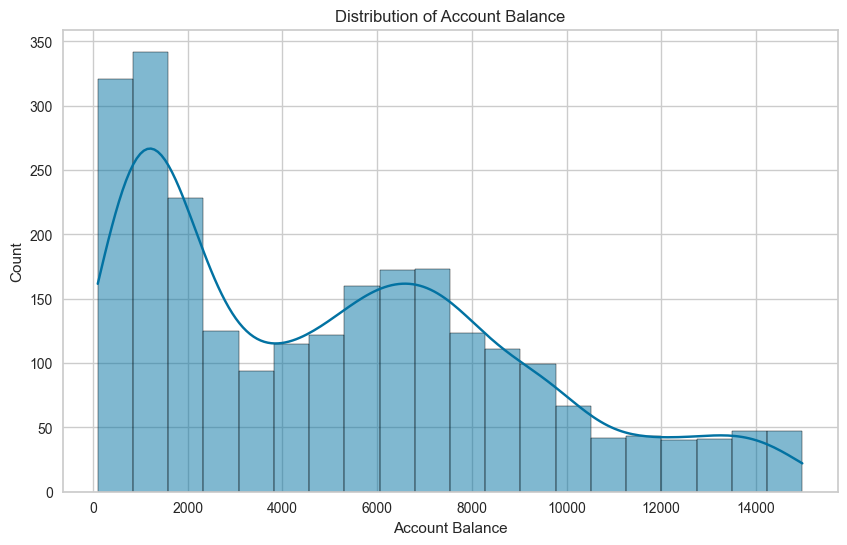

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df["AccountBalance"], bins=20, edgecolor='black', kde=True)
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Account Balance')
plt.show()

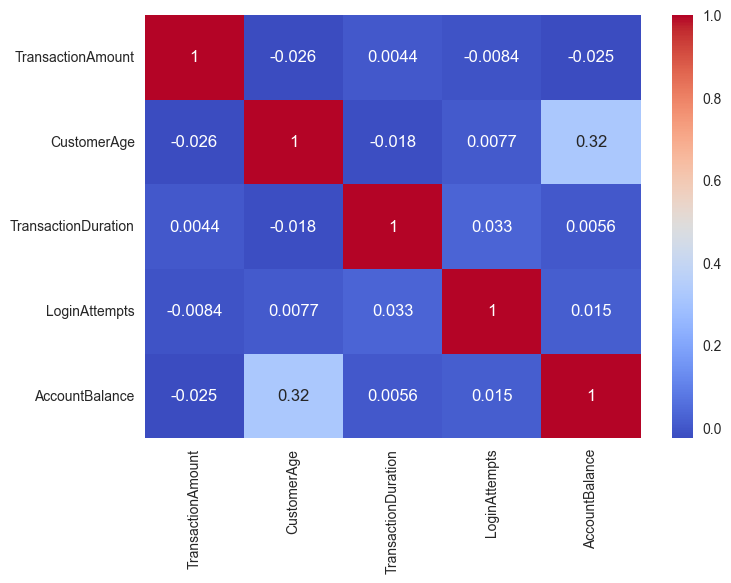

In [12]:
numerical_corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(numerical_corr, cmap="coolwarm", annot=True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [13]:
# Drop kolom tidak digunakan
df = df.drop(columns=["TransactionID", "AccountID", "TransactionDate", "PreviousTransactionDate", "IP Address", "DeviceID", "MerchantID"])

In [14]:
# Cek missing value
missing_values = df.isnull().sum()
missing_values

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

In [15]:
# Cek duplikat
total_duplicates = df.duplicated().sum()
print(f"Jumlah total data duplikat: {total_duplicates}")

Jumlah total data duplikat: 0


In [16]:
numerical_data = df.select_dtypes(include=np.number)
numerical_features = numerical_data.columns

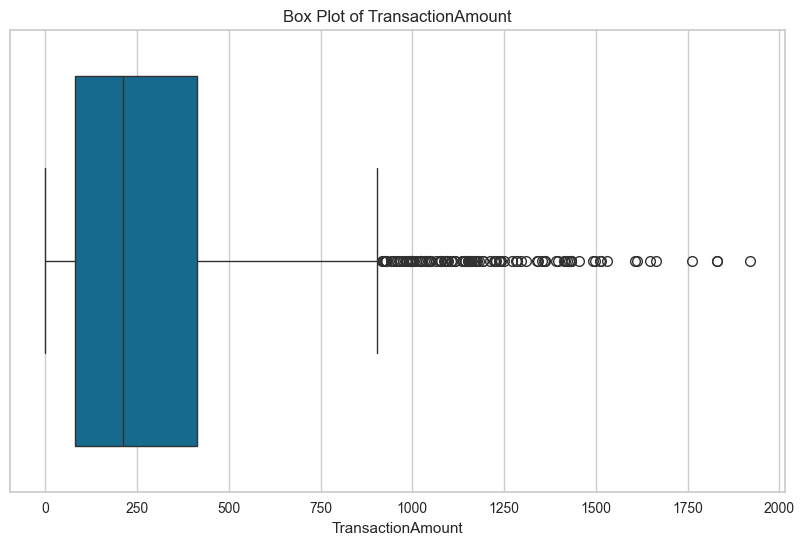

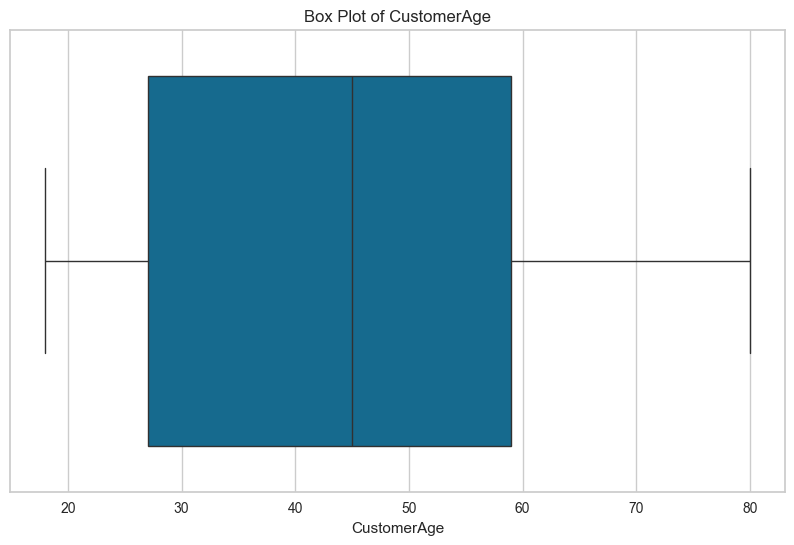

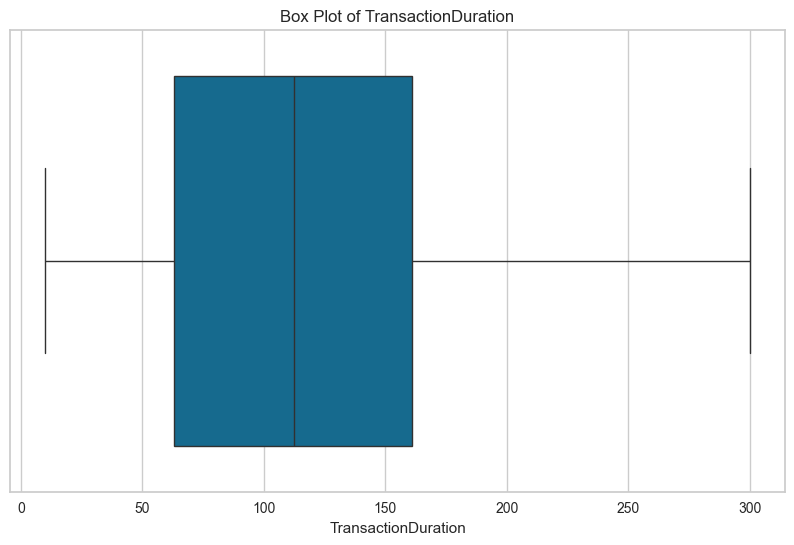

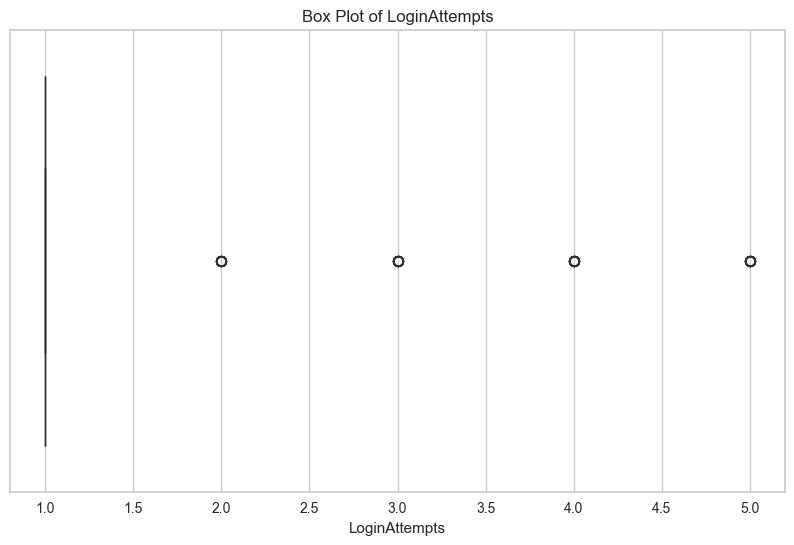

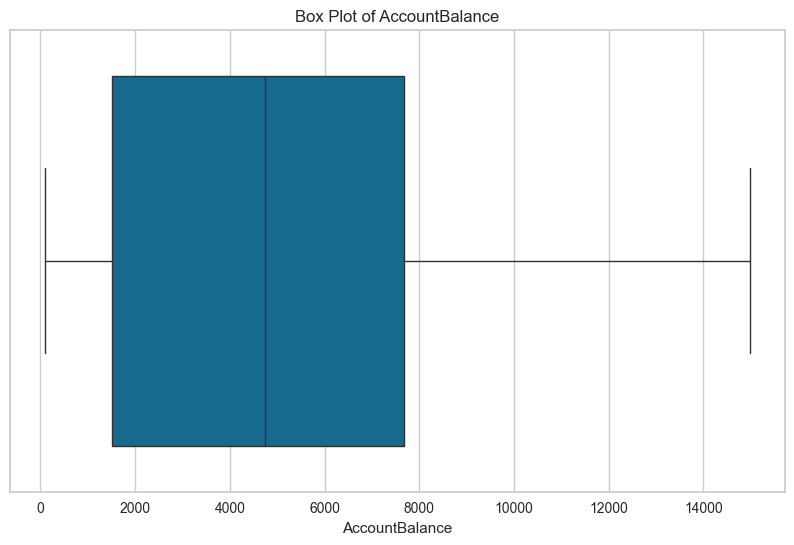

In [17]:
# Cek outlier nenggunakan boxplot
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [18]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[numerical_features] < (Q1 - 1.5 *IQR)) | (df[numerical_features] > (Q3 + 1.5 *IQR))).any(axis=1)
df_filtered = df.loc[condition, numerical_features]

In [19]:
df_filtered

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


In [20]:
columns_categorical = [col for col in df.columns if col not in numerical_features]
df[columns_categorical]

,TransactionType,Location,Channel,CustomerOccupation
0,Debit,San Diego,ATM,Doctor
1,Debit,Houston,ATM,Doctor
2,Debit,Mesa,Online,Student
3,Debit,Raleigh,Online,Student
4,Credit,Atlanta,Online,Student
...,...,...,...,...
2507,Credit,Colorado Springs,Branch,Doctor
2508,Debit,Tucson,Branch,Doctor
2509,Debit,San Diego,Branch,Retired
2510,Debit,Denver,Online,Student


In [21]:
data_processed = pd.concat([pd.DataFrame(df_filtered, columns=numerical_features), df[columns_categorical]], axis=1)
data_processed = data_processed.dropna()

In [22]:
data_processed

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student
...,...,...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,1.0,12690.79,Credit,Colorado Springs,Branch,Doctor
2508,251.54,48.0,177.0,1.0,254.75,Debit,Tucson,Branch,Doctor
2509,28.63,56.0,146.0,1.0,3382.91,Debit,San Diego,Branch,Retired
2510,185.97,23.0,19.0,1.0,1776.91,Debit,Denver,Online,Student


In [23]:
# Encoding Data Kategorikal
df_encoded = pd.get_dummies(data_processed, columns=['TransactionType', 'Location', 'Channel', 'CustomerOccupation'])
df_encoded

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,...,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70.0,81.0,1.0,5112.21,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,376.24,68.0,141.0,1.0,13758.91,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,126.29,19.0,56.0,1.0,1122.35,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,184.50,26.0,25.0,1.0,8569.06,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,13.45,26.0,198.0,1.0,7429.40,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33.0,109.0,1.0,12690.79,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2508,251.54,48.0,177.0,1.0,254.75,False,True,False,False,False,...,True,False,False,False,True,False,True,False,False,False
2509,28.63,56.0,146.0,1.0,3382.91,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2510,185.97,23.0,19.0,1.0,1776.91,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)
df_scaled

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Location_Albuquerque,Location_Atlanta,Location_Austin,...,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,-0.543725,0.0,-0.001892,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,1.429219,-0.733305,-0.688593,1.735092,-0.576338,-0.561492,-0.595233
1,0.554382,1.316759,0.315402,0.0,2.226312,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,1.429219,-0.733305,-0.688593,1.735092,-0.576338,-0.561492,-0.595233
2,-0.593515,-1.450340,-0.901695,0.0,-1.030055,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,-0.733305,1.452237,-0.576338,-0.576338,-0.561492,1.680014
3,-0.326185,-1.055040,-1.345577,0.0,0.888919,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,-0.733305,1.452237,-0.576338,-0.576338,-0.561492,1.680014
4,-1.111734,-1.055040,1.131573,0.0,0.595235,1.845374,-1.845374,-0.128379,6.247807,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,-0.733305,1.452237,-0.576338,-0.576338,-0.561492,1.680014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2.758647,-0.659740,-0.142799,0.0,1.951064,1.845374,-1.845374,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,1.363690,-0.688593,1.735092,-0.576338,-0.561492,-0.595233
2278,-0.018304,0.187331,0.830879,0.0,-1.253631,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,5.934831,-0.149671,-0.141832,-0.699683,1.363690,-0.688593,1.735092,-0.576338,-0.561492,-0.595233
2279,-1.042019,0.639102,0.386996,0.0,-0.447522,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,1.363690,-0.688593,-0.576338,-0.576338,1.780968,-0.595233
2280,-0.319434,-1.224455,-1.431490,0.0,-0.861379,-0.541896,0.541896,-0.128379,-0.160056,-0.149671,...,-0.168497,-0.149671,-0.141832,-0.699683,-0.733305,1.452237,-0.576338,-0.576338,-0.561492,1.680014


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
# Model awal
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

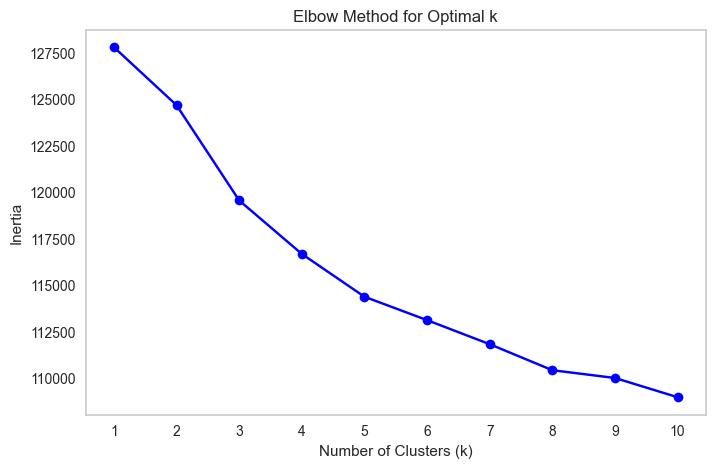

In [26]:
# Evaluasi elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, '-o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [27]:
for clusters in range(2, 10): 
    kmeans = KMeans(n_clusters=clusters, init='k-means++')
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    print(f"Cluster sebanyak {clusters} menghasilkan Silhouette score sebesar {score}")

Cluster sebanyak 2 menghasilkan Silhouette score sebesar 0.03218726292715028
Cluster sebanyak 3 menghasilkan Silhouette score sebesar 0.033798441909283904
Cluster sebanyak 4 menghasilkan Silhouette score sebesar 0.04092282937274968
Cluster sebanyak 5 menghasilkan Silhouette score sebesar 0.03335695930925255
Cluster sebanyak 6 menghasilkan Silhouette score sebesar 0.03708059478517212
Cluster sebanyak 7 menghasilkan Silhouette score sebesar 0.05175157623791359
Cluster sebanyak 8 menghasilkan Silhouette score sebesar 0.054858347312627447
Cluster sebanyak 9 menghasilkan Silhouette score sebesar 0.0471868641484724


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
# Seleksi Fitur menggunakan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

for clusters in range(2, 10): 
    kmeans_new = KMeans(n_clusters=clusters, init='k-means++', random_state=42)
    kmeans_new.fit(pca_data)
    score = silhouette_score(pca_data, kmeans_new.labels_)
    print(f"Cluster sebanyak {clusters} menghasilkan Silhouette score sebesar {score}")

Cluster sebanyak 2 menghasilkan Silhouette score sebesar 0.4695669600922974
Cluster sebanyak 3 menghasilkan Silhouette score sebesar 0.574445183155856
Cluster sebanyak 4 menghasilkan Silhouette score sebesar 0.45173715286306165
Cluster sebanyak 5 menghasilkan Silhouette score sebesar 0.4984632759182328
Cluster sebanyak 6 menghasilkan Silhouette score sebesar 0.5391644011200442
Cluster sebanyak 7 menghasilkan Silhouette score sebesar 0.5209771598295264
Cluster sebanyak 8 menghasilkan Silhouette score sebesar 0.5291712608958772
Cluster sebanyak 9 menghasilkan Silhouette score sebesar 0.5528118540861451


In [29]:
# Model Final
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_final.fit(pca_data)
labels = kmeans_final.labels_

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

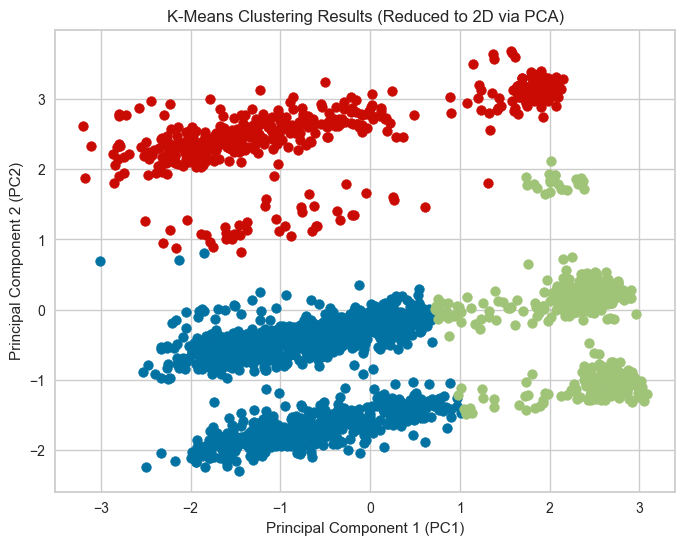

In [30]:
df_temp = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_temp['Cluster'] = labels
df_temp

plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    cluster_data = df_temp[df_temp['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=50)

plt.title("K-Means Clustering Results (Reduced to 2D via PCA)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [31]:
# Bobot/kontribusi fitur asli pada masing masing komponen PCA
pd.options.display.float_format = '{:.6f}'.format

loading_matrix = pca.components_.T
loading_matrix_abs = np.abs(loading_matrix)
loading_matrix_sorted = np.sort(loading_matrix_abs, axis=None)[::-1]
loading_matrix_fix = loading_matrix_sorted.reshape(57, 2)
feature_contributions = pd.DataFrame(loading_matrix_fix, columns=['PC1', 'PC2'], index=df_encoded.columns)
feature_contributions

,PC1,PC2
TransactionAmount,0.595842,0.595842
CustomerAge,0.556840,0.530539
TransactionDuration,0.429415,0.388035
LoginAttempts,0.289093,0.279231
AccountBalance,0.196272,0.189966
TransactionType_Credit,0.127775,0.127775
TransactionType_Debit,0.108944,0.095759
Location_Albuquerque,0.095123,0.090175
Location_Atlanta,0.075936,0.057499
Location_Austin,0.054110,0.053723


In [32]:
data_processed['Cluster'] = labels
cluster_stats = data_processed.groupby('Cluster').describe()
cluster_stats.T

Cluster                              0           1            2
TransactionAmount   count  1263.000000  525.000000   494.000000
                    mean    246.205344  265.280724   268.987206
                    std     208.693151  225.505667   231.134026
                    min       0.320000    0.260000     2.030000
                    25%      77.485000   81.510000    77.955000
                    50%     189.770000  199.800000   214.635000
                    75%     365.675000  388.980000   389.265000
                    max     896.790000  903.190000   890.240000
CustomerAge         count  1263.000000  525.000000   494.000000
                    mean     52.625495   23.683810    46.692308
                    std      13.910509    3.824268    17.474480
                    min      26.000000   18.000000    18.000000
                    25%      41.000000   21.000000    30.000000
                    50%      54.000000   24.000000    49.000000
                    75%      63.000000   26.000000    60.000000
                    max      80.000000   42.000000    80.000000
TransactionDuration count  1263.000000  525.000000   494.000000
                    mean    118.167854  121.386667   118.465587
                    std      69.542325   72.255570    68.113747
                    min      10.000000   11.000000    10.000000
                    25%      63.000000   63.000000    63.250000
                    50%     111.000000  115.000000   109.000000
                    75%     161.000000  165.000000   159.750000
                    max     300.000000  299.000000   294.000000
LoginAttempts       count  1263.000000  525.000000   494.000000
                    mean      1.000000    1.000000     1.000000
                    std       0.000000    0.000000     0.000000
                    min       1.000000    1.000000     1.000000
                    25%       1.000000    1.000000     1.000000
                    50%       1.000000    1.000000     1.000000
                    75%       1.000000    1.000000     1.000000
                    max       1.000000    1.000000     1.000000
AccountBalance      count  1263.000000  525.000000   494.000000
                    mean   6494.604861 1571.352190  5374.833158
                    std    3549.268442 1850.973200  3936.953458
                    min     120.890000  101.250000   105.010000
                    25%    3857.825000  618.050000  1767.405000
                    50%    6366.430000 1075.150000  5137.270000
                    75%    8596.360000 1649.430000  7816.427500
                    max   14977.990000 9951.680000 14935.500000

In [33]:
# Modus pada fitur kategori
categorical_cols = data_processed.select_dtypes(include=['object', 'category']).columns
categorical_stats = data_processed.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
categorical_stats.T

Cluster,0,1,2
TransactionType,Debit,Debit,Credit
Location,Charlotte,Los Angeles,Austin
Channel,ATM,ATM,Branch
CustomerOccupation,Doctor,Student,Retired


Tulis hasil interpretasinya di sini.
1. Cluster 1:\
Pada cluster ini mencakup nasabah yang melakukan transaksi dengan jumlah transaksi yang tinggi. Nasabah pada cluster ini cenderung memiliki umur yang lebih tua dan saldo akun atau account balance yang sangat tinggi. Nasabah pada cluster ini juga lebih banyak memiliki Debit dan menggunakan transaksi dengan jenis ATM. Kebanyakan nasabah pada cluster ini bekerja sebagai Dokter.

2. Cluster 2:\
Tidak seperti cluster sebelumnya, cluster ini memiliki nasabah yang melakukan transaksi dengan jumlah transaksi yang sangat tinggi. Tetapi, nasabah pada cluster ini cenderung memiliki umur yang lebih muda, yaitu sekitar 23 tahun. Tidak hanya itu, Nasabah di cluster ini pun memiliki saldo akun yang cukup rendah, yaitu sekitar 1571. Nasabah pada cluster ini lebih banyak memiliki tipe kartu Debit dan menggunakan transaksi dengan jenis ATM. Kebanyakan nasabah pada cluster ini merupakan seorang siswa.
3. Cluster 3:\
Cluster ini terdiri dari nasabah yang melakukan transaksi dengan jumlah transaksi yang sangat tinggi dan juga cenderung memiliki umur yang lebih tua, yaitu sekitar 46 tahun. Saldo akun pada kebanyakan nasabah pada cluster ini cukup tinggi. Tidak seperti cluster-cluster sebelumnya, nasabah pada cluster ini memiliki jenis kartu Credit dan menggunakan transaksi dengan jenis Branch. Kebanyakan nasabah pada cluster ini merupakan orang yang telah pensiun.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
data_processed

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.090000,70.000000,81.000000,1.000000,5112.210000,Debit,San Diego,ATM,Doctor,0
1,376.240000,68.000000,141.000000,1.000000,13758.910000,Debit,Houston,ATM,Doctor,0
2,126.290000,19.000000,56.000000,1.000000,1122.350000,Debit,Mesa,Online,Student,1
3,184.500000,26.000000,25.000000,1.000000,8569.060000,Debit,Raleigh,Online,Student,1
4,13.450000,26.000000,198.000000,1.000000,7429.400000,Credit,Atlanta,Online,Student,2
...,...,...,...,...,...,...,...,...,...,...
2507,856.210000,33.000000,109.000000,1.000000,12690.790000,Credit,Colorado Springs,Branch,Doctor,2
2508,251.540000,48.000000,177.000000,1.000000,254.750000,Debit,Tucson,Branch,Doctor,0
2509,28.630000,56.000000,146.000000,1.000000,3382.910000,Debit,San Diego,Branch,Retired,0
2510,185.970000,23.000000,19.000000,1.000000,1776.910000,Debit,Denver,Online,Student,1


In [35]:
data_processed.to_csv('hasil_clustering.csv', index=False)